In [0]:

display(dbutils.fs.ls("/FileStore/tables"))

path,name,size
dbfs:/FileStore/tables/ComparativaSparkConDatosKeel_S_ST_CT.csv,ComparativaSparkConDatosKeel_S_ST_CT.csv,96920
dbfs:/FileStore/tables/ComparativaSupervised_Keel.csv,ComparativaSupervised_Keel.csv,15242
dbfs:/FileStore/tables/adult.data,adult.data,3974305
dbfs:/FileStore/tables/banana.csv,banana.csv,88666
dbfs:/FileStore/tables/cancerWisconsin.csv,cancerWisconsin.csv,125204
dbfs:/FileStore/tables/coil2000.csv,coil2000.csv,1708042
dbfs:/FileStore/tables/heart.csv,heart.csv,10258
dbfs:/FileStore/tables/hepatitis.csv,hepatitis.csv,7585
dbfs:/FileStore/tables/magic.csv,magic.csv,1496498
dbfs:/FileStore/tables/notebookStructureDBC.png,notebookStructureDBC.png,43826


In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/resultsTots.csv")) 
df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/ComparativaSparkConDatosKeel_S_ST_CT.csv"))
results = df.select("*").toPandas()

#tipamos
results['percentageLabeled']=results['percentageLabeled'].astype(float)
results['accuracy']=results['accuracy'].astype(float)
results['AUC']=results['AUC'].astype(float)
results['PR']=results['PR'].astype(float)
results['F1score']=results['F1score'].astype(float)




def visuMetricasClasificadores(data,resultados):
  metricas = ['accuracy','AUC','PR','F1score']
  clasificadores = ['DT-Spark','LR-Spark','RF-Spark','NB-Spark']#clasificadores = ['DT','LR','RF','NB','LSVM']
  colors = ['blue','green','red','cyan']#colors = ['blue','green','red','cyan','magenta']
  style = ['o','x','.','+']#style = ['o','x','.','+','*']
  cColors = 0
  cStyle =0
  cMetrica = 0
  fig, ax = plt.subplots(2,2,figsize=(18, 10))
  fig.suptitle(data,fontsize=20)

  for metrica in metricas:
    for clasi in clasificadores:
      resultsIntermedio=resultados[resultados['data']==data]
      #resultsIntermedio=resultsIntermedio[resultsIntermedio['clasificador']==clasi]
      resultsIntermedio=resultsIntermedio[resultsIntermedio['classifier']==clasi] 
      resultsIntermedio=resultsIntermedio[['percentageLabeled','accuracy','AUC','PR','F1score']]
      #resultsIntermedio=resultsIntermedio[['porcentajeEtiquetado','accuracy','AUC','PR','F1score']]
      #resultsIntermedio=resultsIntermedio.groupby(['porcentajeEtiquetado']).sum()
      resultsIntermedio=resultsIntermedio.groupby(['percentageLabeled']).sum()
      if cMetrica<2:
        ax[0][cMetrica].plot (resultsIntermedio[metrica], color=colors[cColors],marker =style[cStyle],label = clasi)
        ax[0][cMetrica].legend()
        ax[0][cMetrica].set_xlabel('percentage')
        ax[0][cMetrica].set_ylabel(metrica)
      else:
        ax[int(bin(cMetrica)[2])][int(bin(cMetrica)[3])].plot (resultsIntermedio[metrica], color=colors[cColors],marker =style[cStyle],label = clasi)
        ax[int(bin(cMetrica)[2])][int(bin(cMetrica)[3])].legend()
        ax[int(bin(cMetrica)[2])][int(bin(cMetrica)[3])].set_xlabel('percentage')
        ax[int(bin(cMetrica)[2])][int(bin(cMetrica)[3])].set_ylabel(metrica)
      cColors = cColors +1
      cStyle = cStyle +1
    cMetrica = cMetrica +1
    cColors =0
    cStyle=0




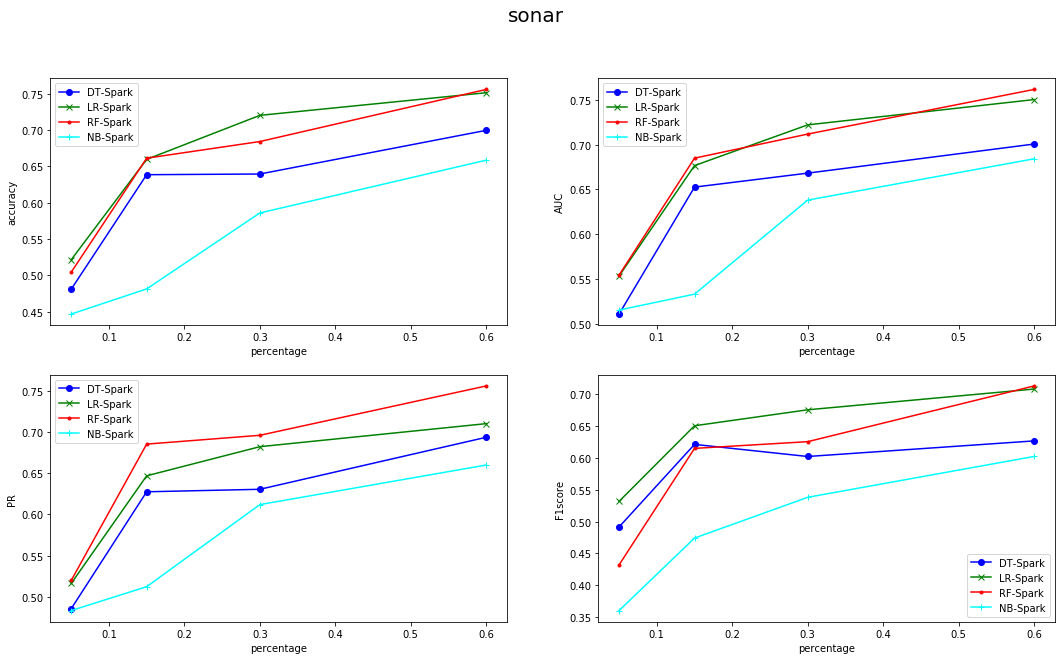

In [0]:
visuMetricasClasificadores('sonar',results)

In [0]:
import seaborn as sns
df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/scatterComparativaKeel_S_ST_CT.csv"))
results = df.select("*").toPandas()
results

Out[56]:

,data,percentage,ST(DT) Keel,ST(DT)Spark,CT(DT) Keel,CT(DT)Spark,DT-Spark,DT-Keel
0,titanic,0.1,0.7751,0.775720854,0.7772,0.772946113,0,0
1,coil2000,0.1,0.9373,0.929280331,0.9404,0.929486733,0,0
2,sonar,0.1,0.6433,0.600343924,0.5904,0.469479523,0,0
3,spectfheart,0.1,0.6819,0.704224212,0.7119,0.73408796,0,0
4,heart,0.1,0.6778,0.681861729,0.7174,0.652615075,0,0
5,banana,0.1,0.8479,0.838112235,0.8517,0.828880149,0,0
6,wisconsin,0.1,0.9093,0.918573833,0.9117,0.906332788,0,0
7,magic,0.1,0.8217,0.796056974,0.8198,0.796575614,0,0
8,titanic,0.2,0.7824,0.785586457,0.7804,0.786786457,0,0
9,coil2000,0.2,0.94,0.934403105,0.9403,0.934755475,0,0


In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/scatterComparativaKeel_S_ST_CT.csv"))
results = df.select("*").toPandas()

def visuScatter(dataX,dataY,axs = 0.45,super=0):
  
  results['percentage']=results['percentage'].astype(float)
  results['DT-Spark']=results['DT-Spark'].astype(float)
  results['DT-Keel']=results['DT-Keel'].astype(float)
  results['ST(DT) Keel']=results['ST(DT) Keel'].astype(float)
  results['ST(DT)Spark']=results['ST(DT)Spark'].astype(float)
  results['CT(DT)Spark']=results['CT(DT)Spark'].astype(float)
  results['CT(DT) Keel']=results['CT(DT) Keel'].astype(float)
  results['DT-Spark']=results['DT-Spark'].astype(float)
  results['DT-Spark']=results['DT-Spark'].astype(float)
  #results2= results[results['data']=="banana"]
  if (super != 1):
    results3= results[results['percentage']<1]
  else:
    results3= results[results['percentage']>=1.0]
   
  g=sns.lmplot(x=dataX, y=dataY, data=results3,fit_reg=False,hue='data',height=5, aspect=8/5, scatter_kws={"s": 80})
  g = g.set(xlim=(axs, 0.98), ylim=(axs, 0.98))
  sns.lineplot([axs, 0.98], [axs, 0.98], color='black', linewidth=2.5)


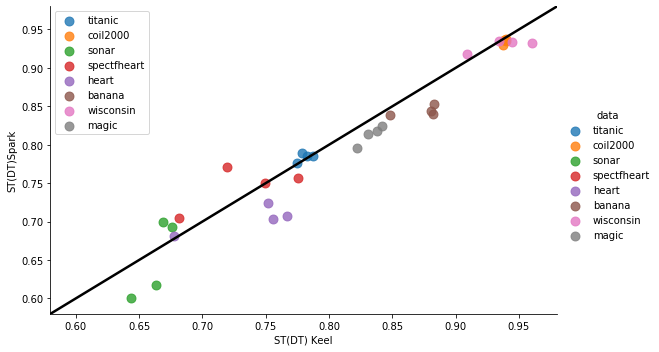

In [0]:
x='ST(DT) Keel'
y='ST(DT)Spark'

visuScatter(x,y,0.58)


Out[111]:

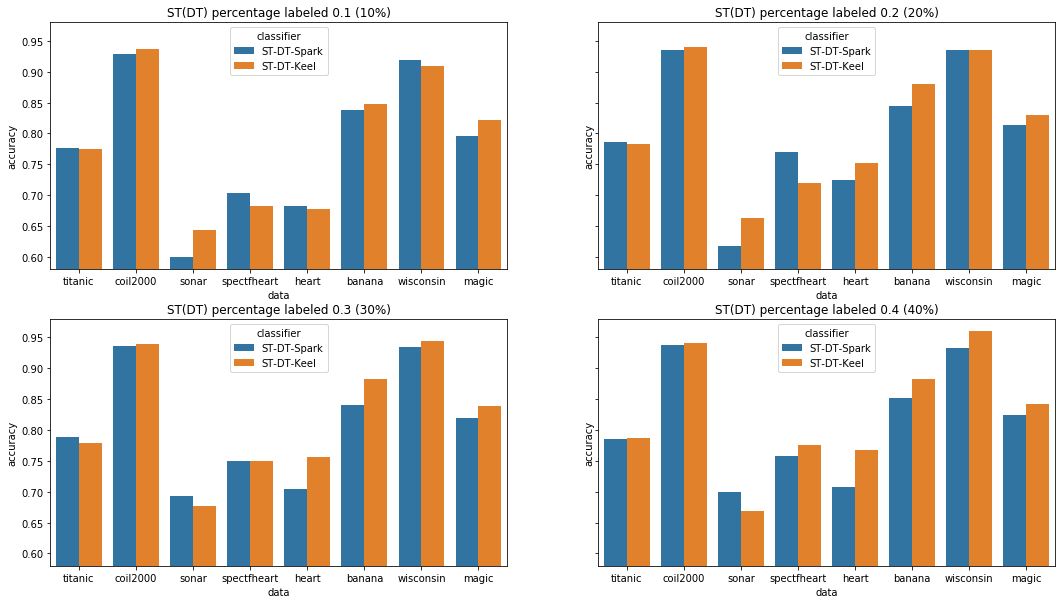

Text(0.5, 1.0, 'ST(DT) percentage labeled 0.4 (40%)')

In [0]:
import seaborn as sns
df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/ComparativaSupervised_Keel.csv"))
results = df.select("*").toPandas()

dataX='data'
dataY='accuracy'

results['percentageLabeled']=results['percentageLabeled'].astype(float)
results['accuracy']=results['accuracy'].astype(float)

#clasi
results= results[results['classifier'].isin(['ST-DT-Keel', 'ST-DT-Spark'])]

fig, axes = plt.subplots(2, 2, figsize=(18,10), sharey=True)

#percentage labeled
results3= results[results['percentageLabeled']==0.1]
g=sns.barplot(ax=axes[0,0],x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)


results3= results[results['percentageLabeled']==0.2]
g=sns.barplot(ax=axes[0,1],x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)

results3= results[results['percentageLabeled']==0.3]
g=sns.barplot(ax=axes[1,0],x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)

results3= results[results['percentageLabeled']==0.4]
g=sns.barplot(ax=axes[1,1],x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)

#size
g = g.set(ylim=(0.58, 0.98))


axes[0,0].set_title('ST(DT) percentage labeled 0.1 (10%)')
axes[0,1].set_title('ST(DT) percentage labeled 0.2 (20%)')
axes[1,0].set_title('ST(DT) percentage labeled 0.3 (30%)')
axes[1,1].set_title('ST(DT) percentage labeled 0.4 (40%)')
#sns.regplot(x=dataX, y=dataY, data=results3, scatter=False) #ax=g.axes[0, 0])


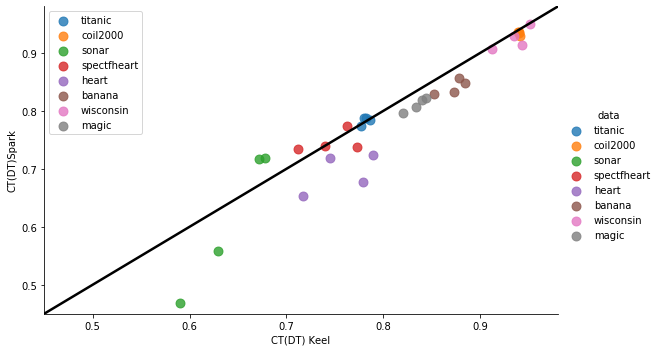

In [0]:
x='CT(DT) Keel'
y='CT(DT)Spark'

visuScatter(x,y)

Out[122]:

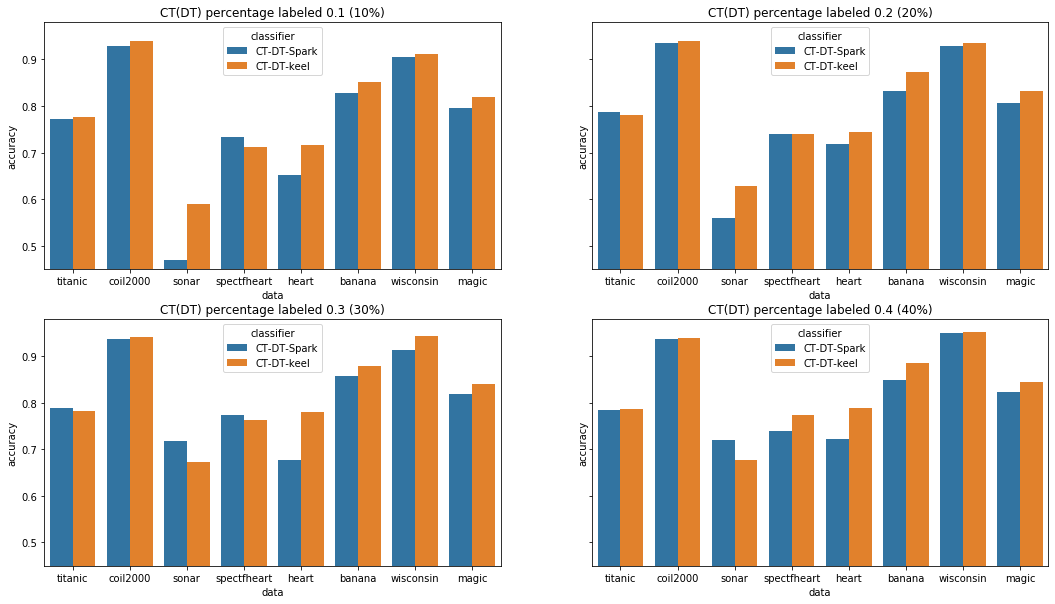

Text(0.5, 1.0, 'CT(DT) percentage labeled 0.4 (40%)')

In [0]:
import seaborn as sns
df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/ComparativaSupervised_Keel.csv"))
results = df.select("*").toPandas()

dataX='data'
dataY='accuracy'

results['percentageLabeled']=results['percentageLabeled'].astype(float)
results['accuracy']=results['accuracy'].astype(float)

#clasi
results= results[results['classifier'].isin(['CT-DT-keel', 'CT-DT-Spark'])]

fig, axes = plt.subplots(2, 2, figsize=(18,10), sharey=True)

#percentage labeled
results3= results[results['percentageLabeled']==0.1]
g=sns.barplot(ax=axes[0,0],x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)


results3= results[results['percentageLabeled']==0.2]
g=sns.barplot(ax=axes[0,1],x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)

results3= results[results['percentageLabeled']==0.3]
g=sns.barplot(ax=axes[1,0],x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)

results3= results[results['percentageLabeled']==0.4]
g=sns.barplot(ax=axes[1,1],x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)

#size
g = g.set(ylim=(0.45, 0.98))


axes[0,0].set_title('CT(DT) percentage labeled 0.1 (10%)')
axes[0,1].set_title('CT(DT) percentage labeled 0.2 (20%)')
axes[1,0].set_title('CT(DT) percentage labeled 0.3 (30%)')
axes[1,1].set_title('CT(DT) percentage labeled 0.4 (40%)')
#sns.regplot(x=dataX, y=dataY, data=results3, scatter=False) #ax=g.axes[0, 0])


Out[93]:

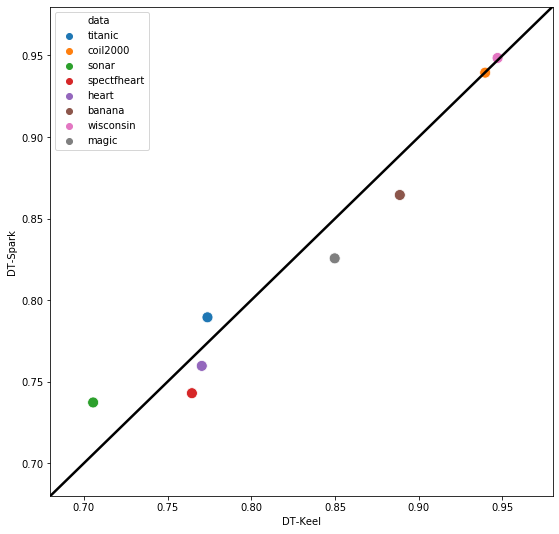

<matplotlib.axes._subplots.AxesSubplot at 0x7f6266bf3d10>

In [0]:
import seaborn as sns
df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/scatterComparativaKeel_S_ST_CT.csv"))
results = df.select("*").toPandas()
results['DT-Spark']=results['DT-Spark'].astype(float)
results['DT-Keel']=results['DT-Keel'].astype(float)
results['percentage']=results['percentage'].astype(float)
results3= results[results['percentage']>=1]
results3

fig, axes = plt.subplots(1, 1, figsize=(9,9), sharey=True)
g=sns.scatterplot(x='DT-Keel', y='DT-Spark', data=results3,hue='data',s=120)# fit_reg=True,hue='data',height=5, aspect=8/5)
g = g.set(xlim=(0.68, 0.98), ylim=(0.68, 0.98))#,xticks=[0.6, 0.75, 0.98], yticks=[0.6, 0.75, 0.98])
sns.lineplot([0.6, 0.98], [0.6, 0.98], color='black', linewidth=2.5)

Out[171]:

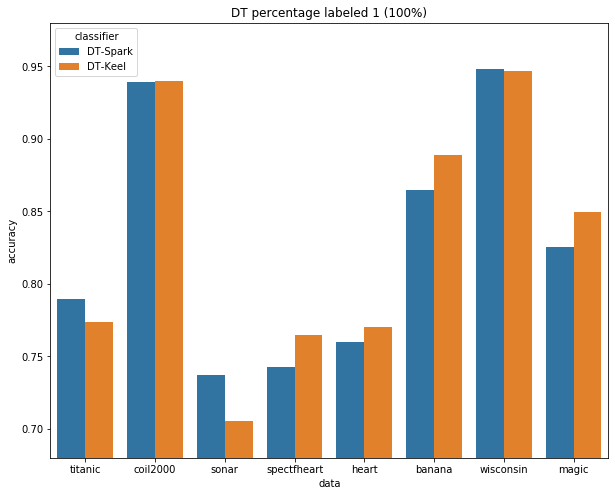

Text(0.5, 1.0, 'DT percentage labeled 1 (100%)')

In [0]:
import seaborn as sns
df = (spark.read.option("header","true").csv("dbfs:/FileStore/tables/ComparativaSupervised_Keel.csv"))
results = df.select("*").toPandas()

dataX='data'
dataY='accuracy'

results['percentageLabeled']=results['percentageLabeled'].astype(float)
results['accuracy']=results['accuracy'].astype(float)

#clasi
results= results[results['classifier'].isin(['DT-Keel', 'DT-Spark'])]

fig, axes = plt.subplots(1, 1, figsize=(10,8), sharey=True)

#percentage labeled
results3= results[results['percentageLabeled']==1]
g=sns.barplot(x=dataX, y=dataY, data=results3,hue='classifier')#fit_reg=False,hue='data')#height=5, aspect=8/5)

#size
g = g.set(ylim=(0.68, 0.98))


axes.set_title('DT percentage labeled 1 (100%)')

#sns.regplot(x=dataX, y=dataY, data=results3, scatter=False) #ax=g.axes[0, 0])
